# Reading data from S3 bucket on local machine using boto

Before working on this notebook we have already authenticated using AWS security key and access id on our git bash command prompt.

Firstly, activated the conda cloud_lab.

Secondly, typed aws configure and authenticated by providing access key and secutity key which we gathered from the security credentials page of our AWS account.

In [42]:
#importing necessary libraries
import boto3
import pandas as pd
import matplotlib.pyplot as plt

We have imported the boto3 library and have chosen the cloud lab environment where we had already installed boto.

Boto3 makes it easy to integrate Python application, library, or script with AWS services including Amazon S3, Amazon EC2, Amazon DynamoDB, and more. In this notebook, we will be accessing the csv file that we saved in our amazon s3 bucket.

We will be starting with instantiating a boto client.

In [68]:
# Instantiate an S3 client
s3_client = boto3.client('s3')

# Check
s3_client

Taking the file from the specific s3 bucket.

In [69]:
# Get the specified file from the specified bucket and assign it to a variable
s3_object = s3_client.get_object(Bucket='kk-bstn-bucket-jan30', Key='merged_file.csv')

# Check
s3_object

{'ResponseMetadata': {'RequestId': '21SZ8Q8R7FJTMAVM',
  'HostId': '/Xk8XV7eojEfkKXmFmEQxCE59ScDo8kZcMkKuIK5qC6jGAkicBeZN+cfmuztozTfZyQLnBDSi8o=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '/Xk8XV7eojEfkKXmFmEQxCE59ScDo8kZcMkKuIK5qC6jGAkicBeZN+cfmuztozTfZyQLnBDSi8o=',
   'x-amz-request-id': '21SZ8Q8R7FJTMAVM',
   'date': 'Mon, 06 Feb 2023 01:01:13 GMT',
   'last-modified': 'Sun, 05 Feb 2023 23:44:34 GMT',
   'etag': '"fb3cf3d45b1fc32b939cbd13697dbe68"',
   'x-amz-server-side-encryption': 'AES256',
   'accept-ranges': 'bytes',
   'content-type': 'text/csv',
   'server': 'AmazonS3',
   'content-length': '7338'},
  'RetryAttempts': 0},
 'AcceptRanges': 'bytes',
 'LastModified': datetime.datetime(2023, 2, 5, 23, 44, 34, tzinfo=tzutc()),
 'ContentLength': 7338,
 'ETag': '"fb3cf3d45b1fc32b939cbd13697dbe68"',
 'ContentType': 'text/csv',
 'ServerSideEncryption': 'AES256',
 'Metadata': {},
 'Body': <botocore.response.StreamingBody at 0x2166f0a56d0>}

In [70]:
type(s3_object['Body'])

botocore.response.StreamingBody

In [71]:
# Read the csv into a dataframe; note that we pass in the 'StreamingBody' above
s3_df = pd.read_csv(s3_object['Body'])

# Check
s3_df

,token,year,frequency,pages,books
0,token,year,frequency,pages,books
1,data,1584,16,14,1
2,data,1614,3,2,1
3,data,1627,1,1,1
4,data,1631,22,18,1
...,...,...,...,...,...
312,data,2004,201841,93539,3483
313,data,2005,197467,88901,3392
314,data,2006,203669,92960,3449
315,data,2007,168338,78986,3246


The first row is same as the column heading. We will remove it.

In [72]:
#removing the first row
s3_df= s3_df.iloc[1:, :]

In [73]:
#resetting index
s3_df.head().reset_index()

,index,token,year,frequency,pages,books
0,1,data,1584,16,14,1
1,2,data,1614,3,2,1
2,3,data,1627,1,1,1
3,4,data,1631,22,18,1
4,5,data,1637,1,1,1


In [74]:
#quick overview
s3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 1 to 316
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   token      316 non-null    object
 1   year       316 non-null    object
 2   frequency  316 non-null    object
 3   pages      316 non-null    object
 4   books      316 non-null    object
dtypes: object(5)
memory usage: 12.5+ KB


The columns year, frequncey, pages, books need to be corrected to right format.

In [78]:
#convert to correct type
s3_df['year']=s3_df['year'].astype('int32')
s3_df['frequency']=s3_df['frequency'].astype('int32')
s3_df['pages']=s3_df['pages'].astype('int32')
s3_df['books']=s3_df['books'].astype('int32')

C:\Users\Soniye\AppData\Local\Temp\ipykernel_14416\3570885124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s3_df['year']=s3_df['year'].astype('int32')
C:\Users\Soniye\AppData\Local\Temp\ipykernel_14416\3570885124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s3_df['frequency']=s3_df['frequency'].astype('int32')
C:\Users\Soniye\AppData\Local\Temp\ipykernel_14416\3570885124.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [79]:
s3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 1 to 316
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   token      316 non-null    object
 1   year       316 non-null    int32 
 2   frequency  316 non-null    int32 
 3   pages      316 non-null    int32 
 4   books      316 non-null    int32 
dtypes: int32(4), object(1)
memory usage: 7.5+ KB


In [34]:
s3_df['year'].nunique()

316

We have 316 rows with 316 unique year data.

In [80]:
s3_df[['year', 'frequency']].describe()

,year,frequency
count,316.000000,316.000000
mean,1847.569620,38555.993671
std,96.874382,69212.366418
min,1584.000000,1.000000
25%,1771.750000,20.750000
50%,1850.500000,3004.000000
75%,1929.250000,41776.750000
max,2008.000000,254561.000000


Let us plot the frequency column and see its relationship with year.

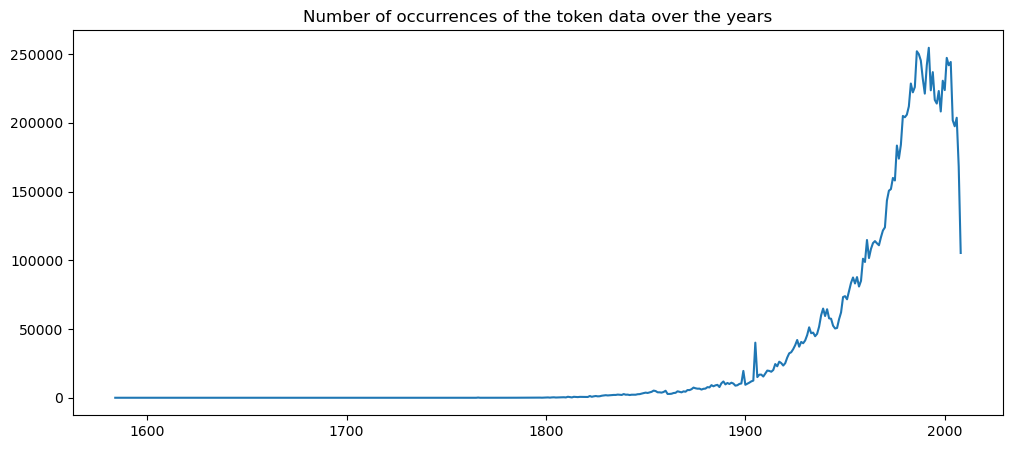

In [82]:
plt.figure(figsize=(12, 5))
plt.plot(s3_df['year'], s3_df['frequency'] )
plt.title("Number of occurrences of the token data over the years")
plt.show()

In [83]:
s3_df.tail()

,token,year,frequency,pages,books
312,data,2004,201841,93539,3483
313,data,2005,197467,88901,3392
314,data,2006,203669,92960,3449
315,data,2007,168338,78986,3246
316,data,2008,105331,47811,2358


At the starting year the search frequncy of token data was very less almost negligible and it started to rise after 1900.
It is littel unclear as to why it is falling after 2000s when the word 'data' started becoming popular.